In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from arm_touchdown import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Run this cell everytime the arm is restarted
rospy.init_node('robot_control_node')

robot_controller = RobotController("Arm_RML", 
                                   ["J1_base", "J2_shoulder", "J3_elbow", 'J4_wrist'], 
                                   "/home/patrick/catkin_ws/src/environmental_robot/arm_control/config/hrdf/anakin.hrdf")
eft = EndEffectorTrajectory(robot_controller)
print(robot_controller.get_joint_angles())
#effort = robot_controller.get_effort()
#print(effort)


Gains path:  /home/patrick/catkin_ws/src/environmental_robot/arm_control/config/gains/anakin_gains.xml
[ 4.77276516  0.03047592 -3.03693485 -0.30877686]
shutdown request: [/robot_control_node] Reason: new node registered with same name


In [9]:
print(robot_controller.get_joint_angles())

[ 4.73329926 -0.02066803 -3.03722572 -0.30878448]


In [15]:
eft.positions = np.array([
    robot_controller.get_joint_angles(), 
    [ 4.73018885, -0.02089119, -3.02992725, 0.09913826]
])

# print(eft.positions)

eft.get_trajectory(total_duration=6)
# print(eft.trajectory.duration)


[ 4.79041767  0.04029113 -3.03364468 -0.26369411]


In [22]:
period = 0.01
effort = np.zeros((int(duration/period), 4))
while t < duration
effort[i, :] = eft.robot_controller.get_effort()
print('effort:\n', effort)


duration = eft.trajectory.duration

NameError: name 'i' is not defined

In [71]:
# stopping at particular torque value

cmd = hebi.GroupCommand(eft.num_joints)

period = 0.01
t = 0.0
duration = eft.trajectory.duration

print('current joint angles:',robot_controller.get_joint_angles())
print('duration:', duration)
print(eft.trajectory.get_state(t))


while (t < duration):
        # self.robot_controller.group.get_next_feedback(reuse_fbk=self.group_fbk)
        eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(t)
        
        
        cmd.position = eft.pos_cmd
        cmd.velocity = eft.vel_cmd
        
        eft.robot_controller.group.send_command(cmd)
        
        effort = eft.robot_controller.get_effort()

        
        # if effort[1] < -8.88:
        #     print('torque out of bounds at t = ', t)
        #     eft.robot_controller.group.command_lifetime = 0
        #     eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(t)
        #     cmd.position = eft.pos_cmd
        #     cmd.velocity = 0
        #     eft.robot_controller.group.send_command(cmd)
        #     print('motors stopped')
        #     break
            

        t = t + period
        sleep(period)

current joint angles: [ 4.73049212 -0.02091312 -3.03864574 -2.81400681]
duration: 6.0
(array([ 4.73050165, -3.03863525,  4.73018885, -3.02992725]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]))


In [72]:
# Reverse the positions

eft.positions = np.array([
    robot_controller.get_joint_angles(), 
    [ 4.7661829,   2.58495361, -1.95124054, -0.92874146],
    [ 4.83683014,  1.60074646, -2.15341663, -0.23106194],
    [ 4.89430189,  0.72055084, -2.27849388, -0.22733116],
    [ 4.79459,     0.39897567, -2.67670345, -0.23143387],  
])

print(eft.positions)

eft.get_trajectory(total_duration=10)
print(eft.trajectory.duration)

[[ 4.68711853 -0.03035831  0.11165649  0.01305801]
 [ 4.7661829   2.58495361 -1.95124054 -0.92874146]
 [ 4.83683014  1.60074646 -2.15341663 -0.23106194]
 [ 4.89430189  0.72055084 -2.27849388 -0.22733116]
 [ 4.79459     0.39897567 -2.67670345 -0.23143387]]
[ 4.68710661 -0.03033638  0.11167556  0.01332122]
10.0


In [40]:
cmd = hebi.GroupCommand(eft.num_joints)

period = 0.01
t = 0.0
duration = eft.trajectory.duration

print('current joint angles:',robot_controller.get_joint_angles())
print('duration:', duration)
print(eft.trajectory.get_state(t))

#eft.robot_controller.group.command_lifetime = 0

while (t < duration):
        # self.robot_controller.group.get_next_feedback(reuse_fbk=self.group_fbk)
    
        eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(t)
        
        
        cmd.position = eft.pos_cmd
        cmd.velocity = eft.vel_cmd
        
        sleep(period)
        eft.robot_controller.group.send_command(cmd)
           

        t = t + period
        sleep(period)

current joint angles: [ 4.75687695  2.41368515 -1.88631058 -0.75894165]
duration: 10.0
(array([ 4.75685787,  2.41365654, -1.88631153, -0.75894737]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]))


current joint angles: [ 4.73012972 -0.02075481 -3.03200245 -2.69569206]
(array([ 4.69172907,  2.58495361, -2.15341663, -0.22733116]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]))


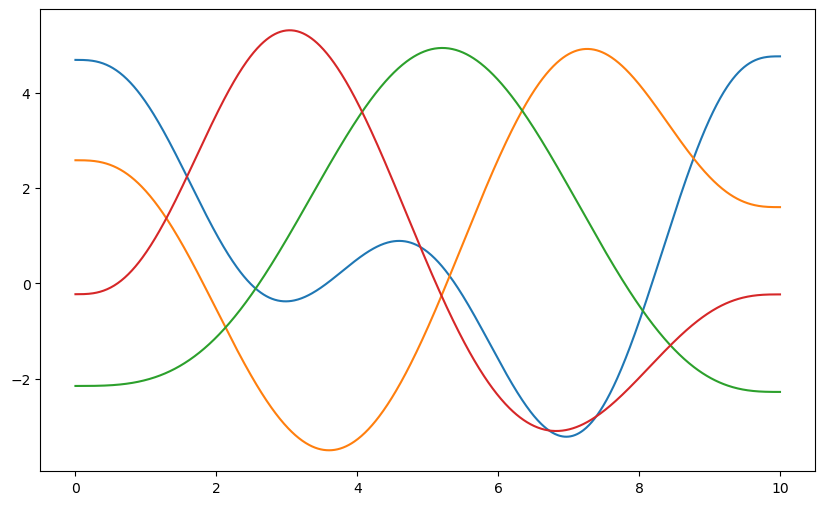

In [43]:
cmd = hebi.GroupCommand(eft.num_joints)
plt.figure(figsize=(10,6))

period = 0.01
t = 0.0
duration = eft.trajectory.duration
print('current joint angles:',robot_controller.get_joint_angles())
print(eft.trajectory.get_state(t))

effort = []
plt_values = []
plt_times = []

while (t < duration):
        # self.robot_controller.group.get_next_feedback(reuse_fbk=self.group_fbk)
        eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(t)
        
        robot_controller.get_effort
        # print(effort)
        
        #    cmd.mstop_strategy = 2
        
        cmd.position = eft.pos_cmd
        cmd.velocity = eft.vel_cmd
        
        plt_values.append(eft.pos_cmd)
        plt_times.append(t)
        
 
        # print(eft.pos_cmd)

        t = t + period

        
# Plot
plt_values = np.array(plt_values)
for i in range(eft.num_joints):
    plt.plot(plt_times, plt_values[:,i], label=f'Joint {i+1}')


In [5]:
cmd = hebi.GroupCommand(eft.num_joints)

period = 0.01
t = 0.0
duration = eft.trajectory.duration

print('current joint angles:',robot_controller.get_joint_angles())
print('duration:', duration)
print(eft.trajectory.get_state(t))


while (t < duration):
        # self.robot_controller.group.get_next_feedback(reuse_fbk=self.group_fbk)
        eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(t)
        
        
        cmd.position = eft.pos_cmd
        cmd.velocity = eft.vel_cmd
    
 
        eft.robot_controller.group.send_command(cmd)

        t = t + period
        sleep(period)

        

current joint angles: [ 4.73395538 -0.02076912 -3.03744221 -0.38743591]
duration: 10.0
(array([ 4.73394489, -0.02077484, -3.03742981, -0.38747406]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]))


In [7]:
# Working IK Values


------ POSITION ARRAY -------
[[ 4.73091793  4.89363516  4.77573206  4.74393144]
 [-0.02057076  0.46017654  1.16832948 -3.78152561]
 [-3.02600002 -2.18277832 -1.97059152 -1.77164562]
 [-2.28942299 -1.28403595 -0.78806982 -5.93687081]]
------------------------------

SyntaxError: invalid syntax (<ipython-input-7-c4d07caaa763>, line 3)

In [ ]:
[ 4.73091793, -0.02057076, -3.01241779, -0.37532043]


[ 4.74286461,  0.07531768, -2.95877361, -0.41710663], 
[ 4.89363516,  0.46017654, -2.18277832, -0.37532043],
[ 4.77134418,  2.00860817, -2.15998077, -0.29337311],
[ 4.73502254,  2.63030655, -1.57555866, -0.37532043]



robot_controller.get_joint_angles(), 
   [ 4.79459,     0.39897567, -2.67670345, -0.23143387], 
   [ 4.89430189,  0.72055084, -2.27849388, -0.22733116],
   [ 4.82306814,  1.07417137, -2.25645161, -0.23069   ],
   [ 4.83683014,  1.60074646, -2.15341663, -0.23106194],
    [ 4.7667532,   2.01732284, -1.83409595, -0.86559677]

In [ ]:
def check_limits(joint_angles, min_constraints, max_constraints):
    if(np.alltrue(joint_angles>min_constraints) and 
       np.alltrue(joint_angles<max_constraints)):
        return True
    else:
        return False

In [55]:
eft.positions = np.array([
    robot_controller.get_joint_angles(), 
   [ 4.79459,     0.39897567, -2.67670345, -0.23143387], 
   [ 4.89430189,  0.72055084, -2.27849388, -0.22733116],
   [ 4.82306814,  1.07417137, -2.25645161, -0.23069   ]
])

print(eft.positions)

eft.get_trajectory(total_duration=2)
print(eft.trajectory.duration)


[[ 4.73779583 -0.01982689 -3.03410912 -0.26693916]
 [ 4.79459     0.39897567 -2.67670345 -0.23143387]
 [ 4.89430189  0.72055084 -2.27849388 -0.22733116]
 [ 4.82306814  1.07417137 -2.25645161 -0.23069   ]]

---------
 Transposed Positions: 
 [[ 4.73779583  4.79459     4.89430189  4.82306814]
 [-0.01982689  0.39897567  0.72055084  1.07417137]
 [-3.03410912 -2.67670345 -2.27849388 -2.25645161]
 [-0.26693916 -0.23143387 -0.22733116 -0.23069   ]] 
---------

2.0


In [65]:
cmd = hebi.GroupCommand(eft.num_joints)

period = 0.01
t = 0.0
duration = eft.trajectory.duration

print('current joint angles:',robot_controller.get_joint_angles())
print('duration:', duration)
print(eft.trajectory.get_state(t))


while (t < duration):
        # self.robot_controller.group.get_next_feedback(reuse_fbk=self.group_fbk)
        eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(t)
        
        
        cmd.position = eft.pos_cmd
        cmd.velocity = eft.vel_cmd
        
        eft.robot_controller.group.send_command(cmd)
        
        effort = eft.robot_controller.get_effort()
        print(effort)
        
        if effort[1] < -6:
            print(t)
            eft.robot_controller.group.command_lifetime = 0
            eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(t)
            cmd.position = eft.pos_cmd
            cmd.velocity = 0
            eft.robot_controller.group.send_command(cmd)
            print('motors stopped')
            break
            

        t = t + period
        sleep(period)
        

# Stop arm at final pose
# eft.robot_controller.group.command_lifetime = 0

# eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(duration)
# cmd.position = eft.pos_cmd
# cmd.velocity = eft.vel_cmd
# eft.robot_controller.group.send_command(cmd)

# effort = eft.robot_controller.get_effort()
# print('Effort:', effort)

        

current joint angles: [ 4.73538256 -0.02066517 -3.03484535 -0.67783356]
duration: 10.0
(array([ 4.73540735, -0.02066422, -3.03479862, -0.67779541]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]))
[ 0.47990134 -0.6215746   0.23631291  0.4146182 ]
[ 0.45785764 -0.6163854   0.15115878  0.32831067]
[ 0.4116699  -0.39346656  0.11037728  0.30151942]
[ 0.2042241  -0.17823674  0.09737809  0.2826891 ]
[ 0.18132307 -0.1326047   0.1059923   0.23539168]
[ 0.18956481 -0.1414067   0.0983962   0.21606122]
[ 0.19385028 -0.13712676  0.09812209  0.21680936]
[ 0.18283571 -0.13413894  0.09749557  0.21571594]
[ 0.18163337 -0.1490787   0.10058898  0.21773012]
[ 0.17055956 -0.13494647  0.09847451  0.22630328]
[ 0.17420568 -0.14334485  0.10391717  0.22647586]
[ 0.16792187 -0.15069392  0.09173909  0.21646407]
[ 0.17932558 -0.13276619  0.09726062  0.22647586]
[ 0.16522595 -0.12880954  0.10540501  0.23102036]
[ 0.16825157 -0.13341221  0.09444117  0.24137245]
[ 0.17463234 -0.12436855  0.08727452  0.24602973]
[

In [53]:
# Stop arm at final pose
eft.robot_controller.group.command_lifetime = 100

eft.pos_cmd, eft.vel_cmd, eft.acc_cmd = eft.trajectory.get_state(duration)
cmd.position = eft.pos_cmd
cmd.velocity = eft.vel_cmd
eft.robot_controller.group.send_command(cmd)

True

In [5]:
# eft.target_positions = [
#            [0.03, 0.0, 0.4], # home 
#            [0.03, 0.2, 0.4], # extend
#            [0.03, 0.4, 0.0], # extend and move down
#             [0.0, 0.4, -0.1] 
#             only x,y,z coordinates
#        ]

# Original Constraints
# eft.min_positions = [4, -2*np.pi, -2*np.pi, -np.pi/2]
# eft.max_positions = [5, 2*np.pi, -1, np.pi/2]
            
# eft.min_positions = [4, -2*np.pi, -3.05, -np.pi]
# eft.max_positions = [5, 2*np.pi, -np.pi/4, np.pi]

# eft.get_trajectory(total_duration=40)

# print("------- POSITION ARRAY -------")
# print(eft.positions)
# print("------------------------------\n")


# for t in eft.times:
#    if not check_limits(eft.trajectory.get_state(t)[0], 
#                        np.array(eft.min_positions), 
#                        np.array(eft.max_positions)):
#        print(eft.trajectory.get_state(t)[0])
#        print("Time = ", t)
#        raise ("Joint Angles not within limits!")